In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,10)
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

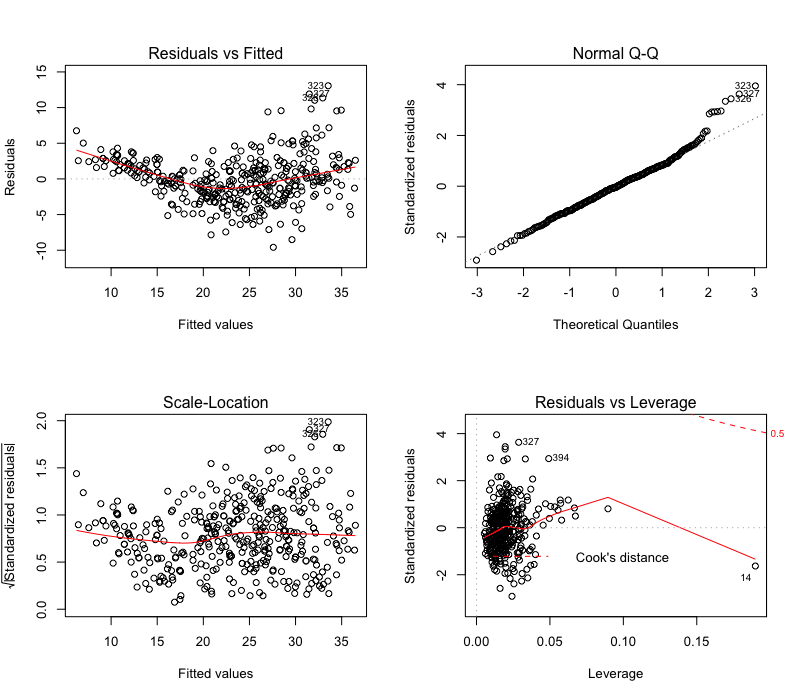

In [2]:
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [3]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data 

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [4]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [5]:
carseats = pd.read_csv('carseats.csv')

In [6]:
model_f = 'Sales ~ CompPrice + \
                 Income + \
                 Advertising + \
                 Price + \
                 ShelveLoc + \
                 Age'

model = smf.ols(formula=model_f, data=carseats)
model_fit = model.fit()

In [7]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          1.25e-170
Time:                        15:58:38   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4752      0.505     10.842      0.000       4.482       6.468
ShelveLoc[T.Good]       4.8357      0.152     31.710      0.000       4.536       5.135
ShelveLoc[T.Medium]     1.9520      0.125     15.569      0.000       1.706       2.198
CompPrice               0.0926      0.004     22.451      0.000       0.084       0.101
Income                  0.0158      0.002      8.590      0.000       0.012       0.019
Advertising             0.1159      0.008     15.006      0.000       0.101       0.131
Price                  -0.0953      0.003    -35.699      0.000      -0.101      -0.090
Age                    -0.0461      0.003    -14.521      0.000      -0.052      -0.040
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

### 1. Residual plot

Le premier graphique généré par `plot()` dans `R` est le **residual plot** , qui dessine un diagramme de dispersion des valeurs ajustées par rapport aux résidus, avec une ligne de régression **lowless**

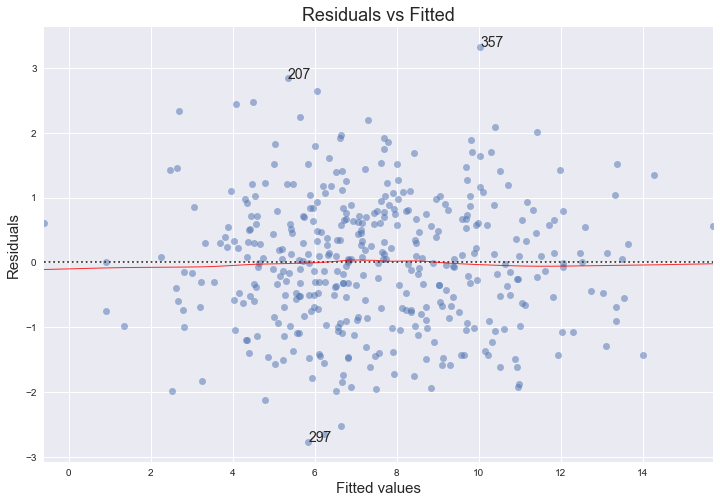

In [11]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y='Sales', data=carseats,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

lowess : « lissage de diagramme de dispersion pondéré localement 

`lowess=True` assure que la ligne de régression la plus basse est tracée.

### 2. QQ-plot

Il montre à quel point la distribution des résidus correspond à la distribution normale. Cela trace les résidus standardisés (z-score) par rapport aux quantiles normaux théoriques. Tout ce qui sort des lignes diagonales peut être un sujet de préoccupation pour une enquête plus approfondie.

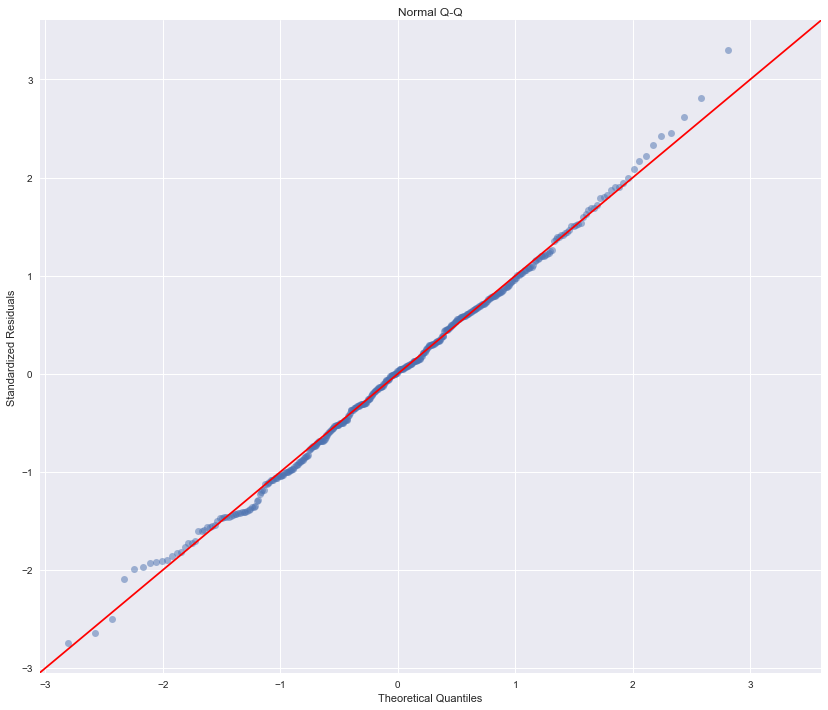

In [64]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1)

plot_lm_2.set_figheight(12)
plot_lm_2.set_figwidth(14)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

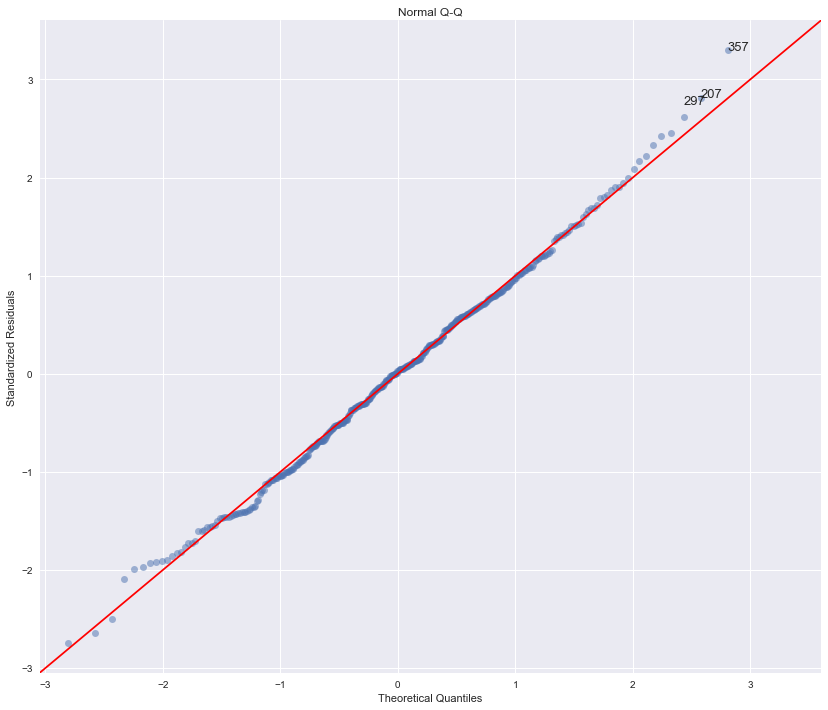

In [63]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1)

plot_lm_2.set_figheight(12)
plot_lm_2.set_figwidth(14)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   abs(model_norm_residuals[i])));

### 3. Scale-Location Plot

Il s'agit d'un autre graphique résiduel, montrant leur propagation, que vous pouvez utiliser pour évaluer l'hétéroscédasticité.

Il s'agit essentiellement d'un nuage de points de résidus normalisés absolus à racine carrée et de valeurs ajustées, avec une ligne de régression inférieure

Les 3 principaux résidus normalisés absolus à racine carrée sont également annotés

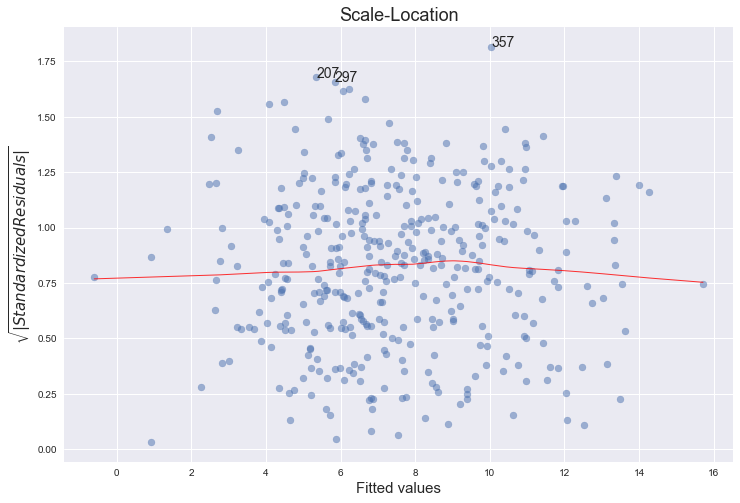

In [14]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

### 4. Leverage plot

Il montre si des valeurs aberrantes ont une influence sur l'ajustement de la régression. Tout ce qui se trouve à l'extérieur du groupe et à l'extérieur des lignes de « distance de Cook » peut avoir un effet influent sur l'ajustement du modèle.

Il y a trois parties dans ce graphique :
        
- La première est le nuage de points des valeurs de levier (obtenues à partir du modèle ajusté de statsmodels à l'aide de get_influence().hat_matrix_diag) par rapport aux résidus standardisés.
                                                            
- La deuxième est la ligne de régression la plus basse pour cela.
                                                            
- La troisième concerne les lignes de distance de Cook (statsmodels a déjà calculé la distance de Cook, nous pouvons donc l'utiliser pour annoter les 3 principaux influenceurs sur le plot 

Cook’s distance (Di) contours pour $D_i = 0.5$ et $D_i = 1$

Le trick est de réarrangé la formule :
$$pD_i = \frac{r_i^2 h_i}{(1−h_i)}$$ pour plot les lignes à 0.5 et 1.

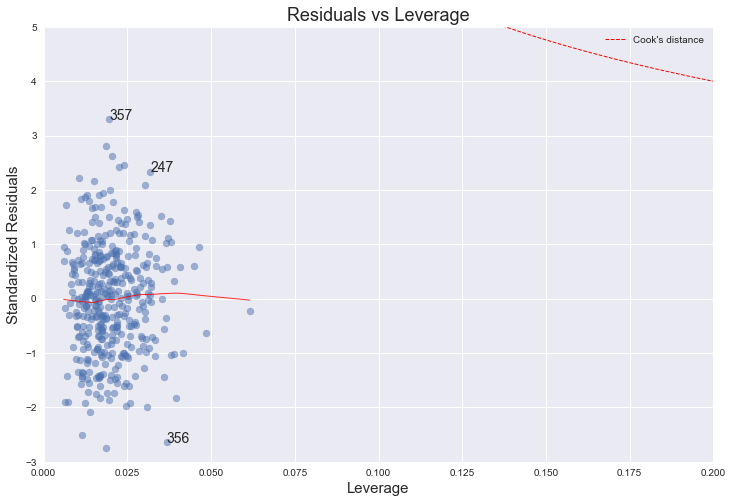

In [16]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(x = model_leverage, y = model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');

### Creation de la fonction r_plot()

In [60]:
plt.rcParams.update({'font.size': 13})

In [56]:
def r_plot(model, target, dataset):
    
    plt.style.use('seaborn')
    from statsmodels.graphics.gofplots import ProbPlot
    
    model_fitted_y = model.fittedvalues
    model_residuals = model.resid
    model_norm_residuals = model.get_influence().resid_studentized_internal
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    model_abs_resid = np.abs(model_residuals)
    model_leverage = model.get_influence().hat_matrix_diag
    model_cooks = model.get_influence().cooks_distance[0]
    
    fig, axes = plt.subplots(2, 2, figsize=(14,12))
    
    sns.residplot(x=model_fitted_y, y='Sales', data=carseats,
                lowess=True,
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
                ax = axes[0, 0])

    axes[0, 0].set_title('Residuals vs Fitted')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')


    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]

    for i in abs_resid_top_3.index:
        axes[0, 0].annotate(i, 
                            xy=(model_fitted_y[i], 
                            model_residuals[i]))
        
        
        
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=axes[0,1])
    
    axes[0,1].set_title('Normal Q-Q')
    axes[0,1].set_xlabel('Theoretical Quantiles')
    axes[0,1].set_ylabel('Standardized Residuals');

    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    
    for r, i in enumerate(abs_norm_resid_top_3):
        axes[0,1].annotate(i, 
                        xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                        model_norm_residuals[i]))
        
        
    axes[1,0].scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=axes[1,0])

    axes[1,0].set_title('Scale-Location')
    axes[1,0].set_xlabel('Fitted values')
    axes[1,0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

    for i in abs_norm_resid_top_3:
        axes[1,0].annotate(i, 
                        xy=(model_fitted_y[i], 
                        model_norm_residuals_abs_sqrt[i]))
        
        
        
        
    axes[1,1].scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(x = model_leverage, y = model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=axes[1,1])

    axes[1,1].set_xlim(0, 0.20)
    axes[1,1].set_ylim(-3, 5)
    axes[1,1].set_title('Residuals vs Leverage')
    axes[1,1].set_xlabel('Leverage')
    axes[1,1].set_ylabel('Standardized Residuals')

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

    for i in leverage_top_3:
        axes[1,1].annotate(i, 
                          xy=(model_leverage[i], 
                          model_norm_residuals[i]))

    # shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(model.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line

    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50)) # 1 line

    plt.legend(loc='upper right');

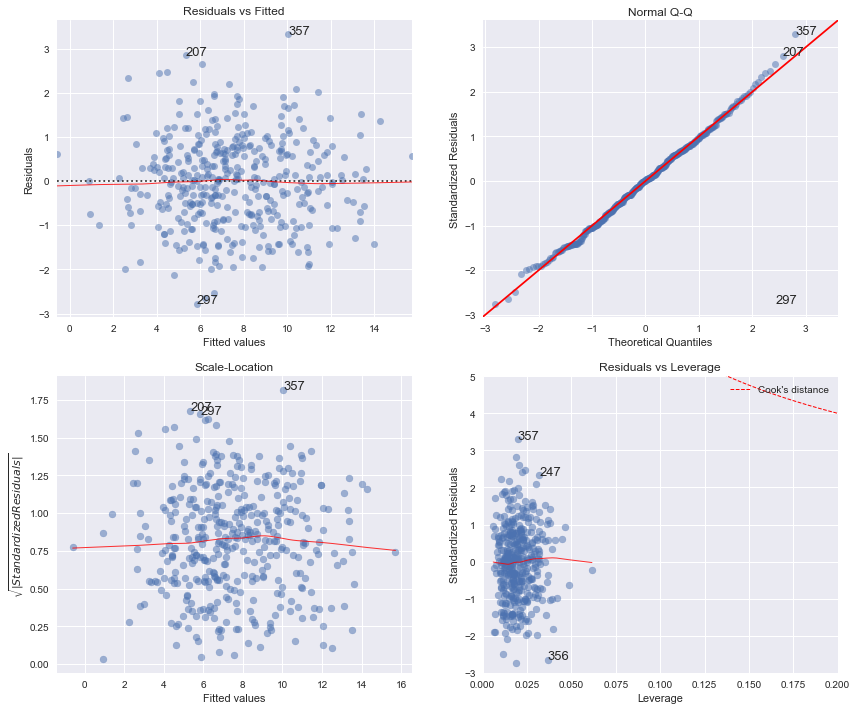

In [61]:
r_plot(model_fit, 'Sales', carseats)